In [20]:
import math

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font=["Ricty Diminished"])

## 2. 回帰(Regression)

### 2.1. 線形回帰(Linear Regression)

分散$\sigma^2$のノイズが乗ったものと仮定し下記の線形関数でフィッティングする

$$
\begin{align*}
p(y) 
&= w_0 + w_1 x + Norm(\epsilon|0,\sigma^2) \\
&= Norm(y|w_0+w_1 x, \sigma^2) \\
\end{align*}
$$

N個のデータがある場合、尤度関数は下記になる

$$
\begin{align*}
p(Y|Z) 
&= \prod_i Norm(Y_i|Z_i W, \sigma^2) \\
&= \prod_i \frac{1}{\sqrt {2\pi \sigma^2}} \exp \left(- \frac{(Y_i - Z_i W)^2}{\sigma^2}\right)
\end{align*}
$$

$$
\begin{align*}
Y =
\begin{pmatrix}
y_1 \\
\vdots \\
y_N
\end{pmatrix},

Z =
\begin{pmatrix}
1 & x_1 \\
\vdots & \vdots \\
1 & x_N
\end{pmatrix},

W =
\begin{pmatrix}
w_0 \\
w_1
\end{pmatrix}

\end{align*}
$$

計算を簡略化するために対数尤度$L$にする

$$
\begin{align*}
L = \log p(Y|Z)
&= -\frac{N}{2}\log{2\pi}-\frac{N}{2}\log{\sigma^2}-\sum_i \left( \frac{(Y_i-Z_i W)^2}{2\sigma^2} \right) \\
&= -\frac{N}{2}\log{2\pi} -\frac{N}{2}\log{\sigma^2}-\frac{(Y-ZW)^T(Y-ZW)}{2\sigma^2}
\end{align*}
$$

対数尤度$L$を微分して推定量を算出

$$
\begin{align*}
\frac{\partial L}{\partial \hat{W}} &= - \frac{Z^T(Y-Z\hat{W})}{2\sigma^2} = 0 \\
\hat{W} &= (Z^TZ)^{-1}Z^TY \\
\frac{\partial L}{\partial \hat{\sigma}^2} &= -\frac{N}{2\hat{\sigma}^2} + \frac{(Y-ZW)^T(Y-ZW)}{2\hat{\sigma}^4} = 0 \\
\hat{\sigma}^2 &= \frac{(Y-ZW)^T(Y-ZW)}{N}
\end{align*}
$$

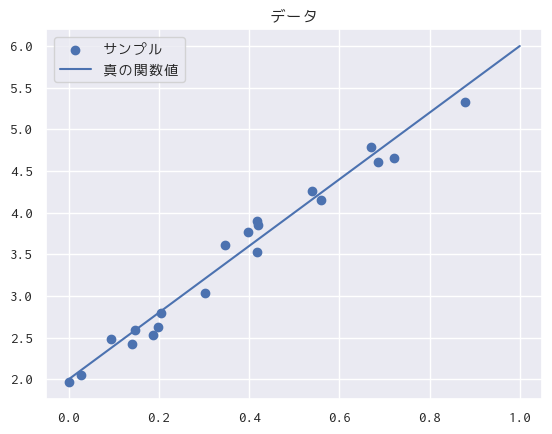

In [44]:
def Leaner(z, w, sigma):
    ret = z @ w
    return ret + np.random.normal(0, sigma, ret.shape)

def Poly(x, degree):
    return np.array([x**i for i in range(degree+1)]).T[0]

np.random.seed(1)

N = 20
NN = 100
sigma = 0.2

W = np.array([[2], [4]])
X = np.random.uniform(0.0, 1.0, N).reshape(N, 1)
Z = Poly(X, 1)
Y = Leaner(Z, W, sigma)

x = np.linspace(0.0, 1.0, NN).reshape(NN, 1)
z = Poly(x, 1)
y = Leaner(z, W, 0)

fig, ax = plt.subplots()
ax.set_title("データ")
ax.scatter(X, Y, label="サンプル")
ax.plot(x, y, label="真の関数値")
ax.legend()
plt.show()

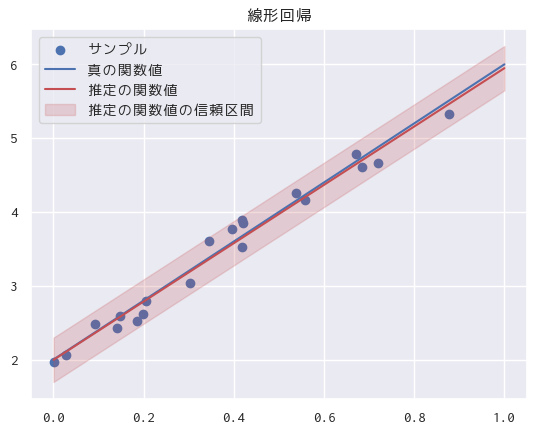

In [45]:
w_hat = np.linalg.inv(Z.T @Z) @ Z.T @ Y
diff = Y - Z @ w_hat
s_hat = np.sqrt(diff.T @ diff / N)[0, 0]

y_hat = Leaner(z, w_hat, 0.0)
y_hat_h = y_hat + 2 * s_hat
y_hat_l = y_hat - 2 * s_hat

fig, ax = plt.subplots()
ax.set_title("線形回帰")
ax.scatter(X, Y, c="b" ,label="サンプル")
ax.plot(x, y, c="b", label="真の関数値")
ax.plot(x, y_hat, c="r", label="推定の関数値")
ax.fill_between(x[:,0], y_hat_l[:,0], y_hat_h[:,0], color="r", alpha=0.2, label="推定の関数値の信頼区間")
ax.legend()
plt.show()

### 2.2. 非線形回帰

#### 2.2.1. 最尤推定

非線形関数の線形和で表現することで線形回帰の理論をそのまま利用可能

$$
\begin{align*}
p(Y|Z) 
&= \prod_i Norm(Y_i|Z_i W, \sigma^2) \\
&= \prod_i \frac{1}{\sqrt {2\pi \sigma^2}} \exp \left(- \frac{(Y_i - Z_i W)^2}{\sigma^2}\right)
\end{align*}
$$

$$
\begin{align*}
Y =
\begin{pmatrix}
y_1 \\
\vdots \\
y_N
\end{pmatrix},

Z =
\begin{pmatrix}
\phi_0(x_1) & \cdots & \phi_D(x_1) \\
\vdots & \ddots &\vdots \\
\phi_0(x_N) & \cdots & \phi_D(x_N)
\end{pmatrix},

W =
\begin{pmatrix}
w_0 \\
\vdots \\
w_D
\end{pmatrix}

\end{align*}
$$

$$
\begin{align*}
\hat{W} &= (Z^TZ)^{-1}Z^TY \\
\hat{\sigma}^2 &= \frac{(Y-ZW)^T(Y-ZW)}{N}
\end{align*}
$$

多項式関数を用いて下記$sin$関数の非線形回帰を行う

$$
\begin{align*}
\phi_d(x) = x^d
\end{align*}
$$

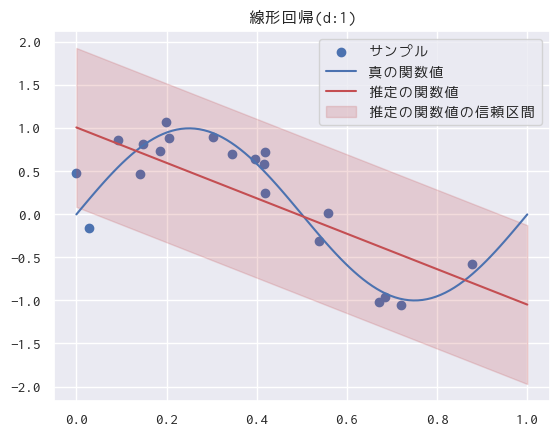

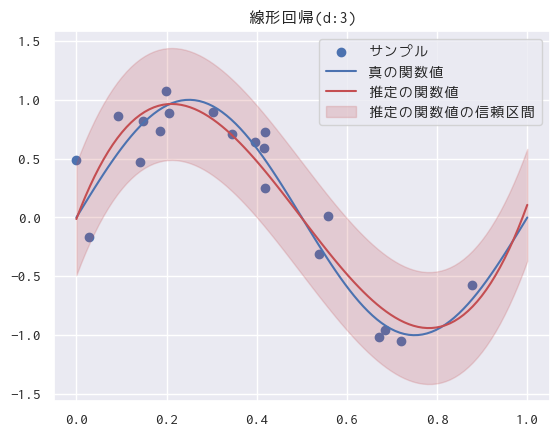

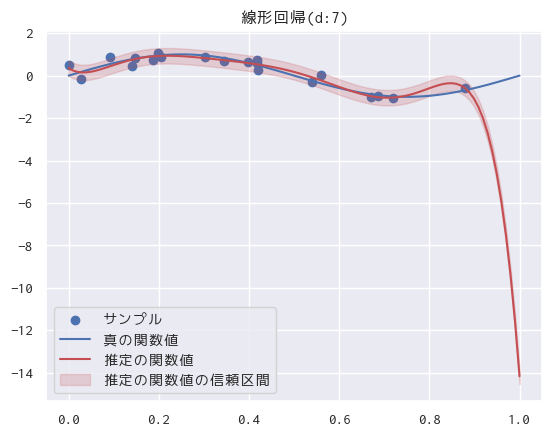

In [67]:
def sin(x, sigma):
    ret = np.sin(2 * np.pi * x)
    return ret + np.random.normal(0, sigma, ret.shape)


np.random.seed(5)

sigma = 0.2
Y = sin(X, sigma)
y = sin(x, 0.0)

for d in [1, 3, 7]:
    Z = Poly(X, d)
    z = Poly(x, d)

    w_hat = np.linalg.inv(Z.T @Z) @ Z.T @ Y
    diff = Y - Z @ w_hat
    s_hat = np.sqrt(diff.T @ diff / N)[0, 0]

    y_hat = Leaner(z, w_hat, 0.0)
    y_hat_h = y_hat + 2 * s_hat
    y_hat_l = y_hat - 2 * s_hat


    fig, ax = plt.subplots()
    ax.set_title(f"線形回帰(d:{d})")
    ax.scatter(X, Y, c="b" ,label="サンプル")
    ax.plot(x, y, c="b", label="真の関数値")
    ax.plot(x, y_hat, c="r", label="推定の関数値")
    ax.fill_between(x[:,0], y_hat_l[:,0], y_hat_h[:,0], color="r", alpha=0.2, label="推定の関数値の信頼区間")
    ax.legend()
    plt.show()
    pass

多項式関数では、多項式の次元を適切に設定する必要がある  
次元が小さいと表現力が低く、目的のモデルをうまく表現できない  
次元が大きいと過学習してしまい、サンプルがない空間での誤差が大きくなってしまう　　

#### 2.2.2. MAP推定(リッジ回帰)

過学習を防ぐために$W$に対して、平均$0$、分散$\sigma^2_p$とあまり大きな値を取らないはずという
事前分布情報を与えてMAP推定を行う

$$
\begin{align*}
p(W|Y,Z) 
&= \frac{p(Y|Z,W)p(W)}{p(Y)} \\
&\propto p(Y|Z,W)p(W) \\
&= \prod_i Norm(Y_i|Z_i W, \sigma^2)\prod_d Norm(W_d|0,\sigma_p^2) \\
&= \prod_i \frac{1}{\sqrt {2\pi \sigma^2}} \exp \left(- \frac{(Y_i - Z_i W)^2}{\sigma^2}\right)
\prod_d \frac{1}{\sqrt {2\pi \sigma_p^2}} \exp \left(- \frac{w_d^2}{\sigma_p^2}\right)
\end{align*}
$$

計算を簡単にするために対数関数$L$にする

$$
\begin{align*}
L
&= -\frac{N+D}{2}\log(2\pi) - \frac{N}{2}\log\sigma^2-\frac{D}{2}\log{\sigma_p^2}
-\sum_i\frac{(Y_i-Z_i W)^2}{2\sigma^2}-\sum_d\frac{W_d^2}{2\sigma_p^2} \\
&= -\frac{N+D}{2}\log(2\pi) - \frac{N}{2}\log\sigma^2-\frac{D}{2}\log{\sigma_p^2}
-\frac{(Y-ZW)^T(Y-ZW)}{2\sigma^2}-\frac{W^TW}{2\sigma_p^2} \\
\end{align*}
$$

対数関数$L$を偏微分することで推定量を算出する

$$
\begin{align*}
\frac{\partial L}{\partial \hat{W}} 
&= -\frac{Z^T(Y-Z\hat{W})}{\sigma^2}-\frac{\hat{W}}{\sigma_p^2} = 0 \\

\hat{W} 
&= \left( Z^TZ + \frac{\sigma^2}{\sigma_p^2}I_D \right)^{-1}Z^TY \\
\end{align*}
$$

$$
\begin{align*}
\frac{\partial L}{\partial \hat{\sigma}^2} 
&= -\frac{N}{2\hat{\sigma}^2} + \frac{(Y-ZW)^T(Y-ZW)}{2\hat{\sigma}^4} = 0 \\

\hat{\sigma}^2 
&= \frac{(Y-ZW)^T(Y-ZW)}{N}

\end{align*}
$$

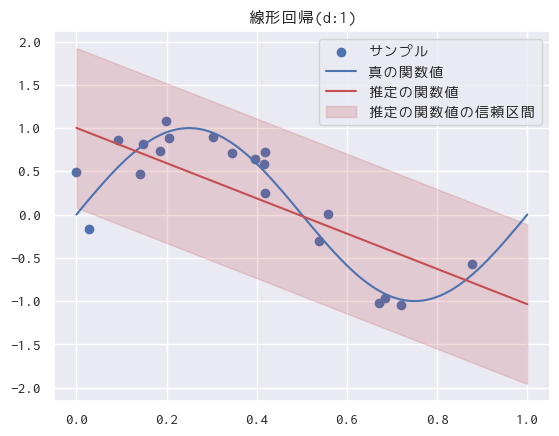

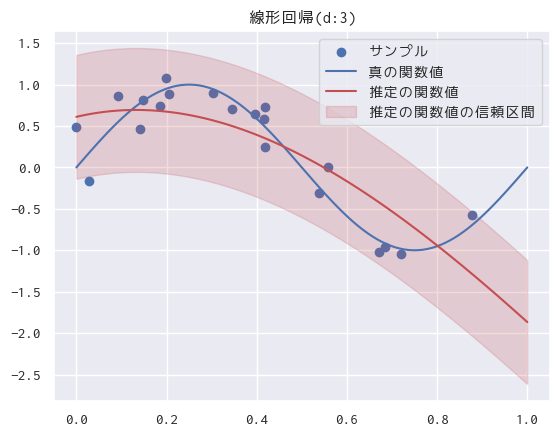

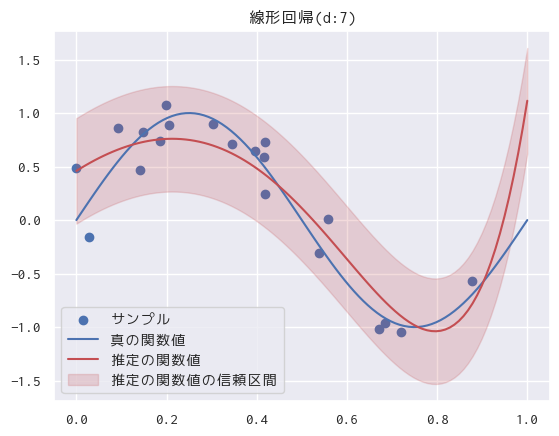

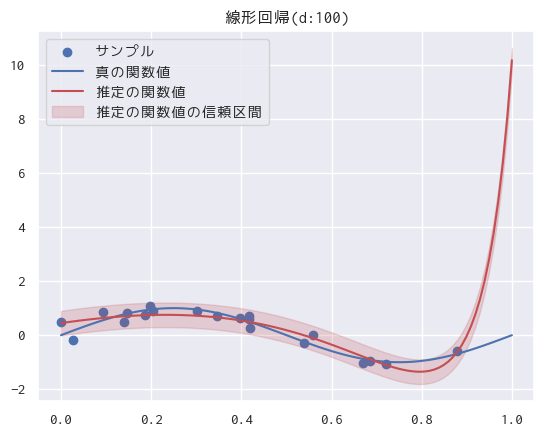

In [89]:
sigma_p = 2
lam = np.power(sigma,2)/np.power(sigma_p,2)

for d in [1, 3, 7, 100]:
    Z = Poly(X, d)
    z = Poly(x, d)

    w_hat = np.linalg.inv(Z.T @Z+lam*np.identity(d+1)) @ Z.T @ Y
    diff = Y - Z @ w_hat
    s_hat = np.sqrt(diff.T @ diff / N)[0, 0]

    y_hat = Leaner(z, w_hat, 0.0)
    y_hat_h = y_hat + 2 * s_hat
    y_hat_l = y_hat - 2 * s_hat


    fig, ax = plt.subplots()
    ax.set_title(f"線形回帰(d:{d})")
    ax.scatter(X, Y, c="b" ,label="サンプル")
    ax.plot(x, y, c="b", label="真の関数値")
    ax.plot(x, y_hat, c="r", label="推定の関数値")
    ax.fill_between(x[:,0], y_hat_l[:,0], y_hat_h[:,0], color="r", alpha=0.2, label="推定の関数値の信頼区間")
    ax.legend()
    plt.show()
    pass

MAP推定を行うことで多項式の次元が大きい場合でも過学習を少なくすることを確認できた

#### 2.3. ベイジアン回帰

MAP推定では正則化項や多項式関数の次元を適切に設定する必要がある  
また、分散が常に一定でデータサンプルが少ない区間でも信頼区間を常に一定で狭く推定するという問題があった  
そこで、データサンプルが少ない場所では信頼区間を狭く、データサンプルが多い場所では信頼区間を広く推定するためにベイズ推定を行う  

$$
\begin{align*}
p(W|Y,Z,a,b) 
&= \frac{p(Y|Z,W,a)p(W|b)}{p(Y|Z,a,b)} \\
&\propto p(Y|Z,W,a)p(W|b) \\
&= \prod_i Norm(Y_i|Z_i W, a^{-1})\prod_d Norm(W_d|0,b^{-1}) \\
&= \prod_i \frac{a}{\sqrt {2\pi}} \exp (- a(Y_i - Z_i W)^2)
\prod_d \frac{b}{\sqrt {2\pi}} \exp(- b w_d^2)
\end{align*}
$$

計算を簡単にするために対数関数$L$を取る

$$
\begin{align*}
L 
&= \log p(W|Y,Z,a,b)  \\
&\propto -\frac{N+D}{2}\log2\pi + \frac{N}{2}\log a + \frac{D}{2}\log b
-\frac{a}{2}(Y-ZW)^T(Y-ZW) - \frac{b}{2}W^TW \\
&\propto -\frac{a}{2}(Y-ZW)^T(Y-ZW) - \frac{b}{2}W^TW \\
&= -\frac{a}{2}(Y^TY-2Y^TZW+W^TZ^TZW)-\frac{b}{2}W^TW \\
&\propto -\frac{1}{2}W^T(aZ^TZ+bI_D)W + (aY^TZ)W \tag{1}
\end{align*}
$$

上記は正規分布従うの下記と等しくなる
$$
\begin{align*}
\log p(W|M,S) 
&= \log \prod Norm(W|M,S) \\
&\propto \frac{1}{2}(W-M)^TS^{-1}(W-M) \\
&\propto -\frac{1}{2}W^TS^{-1}W+M^TS^{-1}W \tag{2}
\end{align*}
$$

$(1)$、$(2)$は等しいので下記になる
$$
\begin{align*}
S^{-1} = aZ^TZ+bI_D \tag{3} \\
S = (aZ^TZ+bI_D)^{-1}
\end{align*}
$$

$$
\begin{align*}
M^TS^{-1} &= aY^TZ \tag{4} \\
M^T &= aY^TZS \\
M &= aSZ^TY \\
\end{align*}
$$

ハイパーパラメータ$a$、$b$はベイズ推定で推定することが困難なので、第二種最尤推定(エビデンス近似)にて推定する

第二種最尤推定とは尤度関数ではなく周辺尤度関数を最大化するパラメータを推定する

$$ 
\begin{align*} 
p(Y|Z,a,b) 
&=\int p(Y|Z,W,a)p(W|b)dW \\
&=\int Norm(Y|ZW,a^{-1})Norm(W|0,b^{-1})dW \\
&=\Bigl(\frac{a}{2\pi}\Bigl)^{N/2}\Bigl(\frac{b}{2\pi}\Bigl)^{D/2}\int\exp\Bigl(-\frac{a}{2}(Y-ZW)^T(Y-ZW)-\frac{b}{2}W^TW\Bigl)dW \\
&=\Bigl(\frac{a}{2\pi}\Bigl)^{N/2}\Bigl(\frac{b}{2\pi}\Bigl)^{D/2}\int\exp(-\frac{1}{2}E(W))dW \tag{5} \\ 
\end{align*}
$$

$$
\begin{align*} 
E(W) 
&=a(Y-ZW)^T(Y-ZW)+b W^TW \\ 
&=a Y^TY-2a Y^TZW+a W^TZ^TZW+b W^TW \tag{6} \\ 
\end{align*} 
$$

$(6)$に$(3)$、$(4)$を代入

$$
\begin{align*} 
E(W)
&=a Y^TY-2M^TS^{-1}W+W^TS^{-1}W \\ 
&=a Y^TY+(W-M)^TS^{-1}(W-M)-M^TS^{-1}M \\ 
&=a Y^TY+(W-M)^TS^{-1}(W-M)-2M^TS^{-1}M+M^TS^{-1}M \\
&=a Y^TY+(W-M)^TS^{-1}(W-M)-2a M^TS^{-1}SZ^TY+M^TS^{-1}M \\ 
&=a Y^TY+(W-M)^TS^{-1}(W-M)-2a M^TZ^TY+M^TS^{-1}M \\ 
&=a(Y-ZM)^T(Y-ZM)+(W-M)^TS^{-1}(W-M)-a M^TZ^TZM+M^TS^{-1}M \\ 
&=a(Y-ZM)^T(Y-ZM)+(W-M)^TS^{-1}(W-M)-a M^TZ^TZM+M^T(a Z^TZ+b I)M \\ 
&=a(Y-ZM)^T(Y-ZM)+(W-M)^TS^{-1}(W-M)+b M^TM \tag{7} \\
\end{align*} 
$$

$(6)$に$(7)$を代入

$$
\begin{align*} 
p(Y|Z,a,b) 
&=\Bigl(\frac{a}{2\pi}\Bigl)^{N/2}\Bigl(\frac{b}{2\pi}\Bigl)^{D/2}\exp\bigl(-\frac{a}{2}(Y-ZM)^T(Y-ZM)-\frac{b}{2} M^TM\bigl) 
\int\exp\bigl(-\frac{1}{2}(W-M)^TS^{-1}(W-M)\bigl)dW \\ 
&=\Bigl(\frac{a}{2\pi}\Bigl)^{N/2}\Bigl(\frac{b}{2\pi}\Bigl)^{D/2}\exp\bigl(-\frac{a}{2}(Y-ZM)^T(Y-ZM)-\frac{b}{2} M^TM\bigl)(2\pi)^{D/2}|S|^{1/2} \\ 
&=(2\pi)^{-N/2}a^{N/2}b^{D/2}\exp\bigl(-\frac{a}{2}(Y-ZM)^T(Y-ZM)-\frac{b}{2} M^TM\bigl)|S|^{1/2} \\ 
\end{align*} 
$$

計算を簡単にするために対数を取る

$$ 
\begin{align} 
\log p(Y|Z,a,b) 
&=\frac{D}{2}\log b+\frac{N}{2}\log a-\frac{N}{2}\log 2\pi-\frac{1}{2}\log|S|-\frac{a}{2}(Y-ZM)^T(Y-ZM)-\frac{b}{2}M^TM \\ 
&=\frac{D}{2}\log b+\frac{N}{2}\log a-\frac{N}{2}\log 2\pi-\frac{1}{2}\log\prod_d \bigl(\lambda_d+b\bigl)-\frac{a}{2}(Y-ZM)^T(Y-ZM)-\frac{b}{2}M^TM \\ 
&=\frac{D}{2}\log b+\frac{N}{2}\log a-\frac{N}{2}\log 2\pi-\frac{1}{2}\sum_d \log(\lambda_d+b\bigl)-\frac{a}{2}(Y-ZM)^T(Y-ZM)-\frac{b}{2}M^TM \\ 
\lambda &:a Z^TZの固有値 
\end{align} 
$$

偏微分して最尤値を算出

$$ 
\begin{align} 
\frac{\partial}{\partial b} \log p(Y|Z, a, b)
&= \frac{D}{2b}-\frac{1}{2}\sum_d\bigl(\frac{1}{\lambda_d+ b }\bigl)-\frac{M^TM}{2} = 0 \\ 
b  M^TM 
&= D-b\sum_d\bigl(\frac{1}{\lambda_d+b }\bigl) \\ 
&=\sum_d\bigl(\frac{\lambda_d+b-b}{\lambda_d+b}\bigl) \\ 
&=\sum_d\bigl(\frac{\lambda_d}{\lambda_d+b}\bigl) \\ 
\gamma 
&=\sum_d\bigl(\frac{\lambda_d}{\lambda_d+b}\bigl) \\ 
b  
&= \frac{\gamma}{M^TM} \\ 
\end{align} 
$$
$$ 
\begin{align} 
\frac{\partial}{\partial a} \log p(Y|Z, a, b)
&= \frac{N}{2a}-\frac{\gamma}{2a}-\frac{(Y-ZM)^T(Y-ZM)}{2} = 0 \\ 
a  
&=\frac{N-\gamma}{(Y-ZM)^T(Y-ZM)} \\
\end{align} 
$$

パラメータは解析的に求められないので収束するまで下記を繰り返すことで求める

周辺尤度関数は多峰性になることが多く局所解に嵌ることが多いので初期値が重要！！ 

$$ 
\begin{align*} 
S &=(a Z^TZ+b I_D)^{-1} \\ 
M &=a SZ^TY \\ 
a &=\frac{N-\gamma}{(Y-ZM)^T(Y-ZM)} \\ 
b&=\frac{\gamma}{M^TM} \\ 
\gamma &=\sum_d\bigl(\frac{\lambda_d}{\lambda_d+b}\bigl) \\ 
\lambda_d &=(a Z^TZ)
\end{align*} 
$$

新たな入力値$x$に対する出力$y$は下記のように$W$を積分消去することで算出できる

$$
\begin{align*}
p(\hat{y}|Z,Y,a,b)
&= \int p(\hat{y}|Z,W,a,b)p(W|Y,Z,a,b)dW \\
&= \int Norm(\hat{y}|ZW,a^{-1})Norm(W|M,S)dW \\
&= Norm(\hat{y}|ZM,ZSZ^{T}+a^{-1}) \\
\end{align*}
$$